In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
#CSV file paths
MouseData_csv = "/users/rebeccatast/desktop/Pymaceuticals-Inc./Resources/MouseData.csv"
StudyResults_csv = "/users/rebeccatast/desktop/Pymaceuticals-Inc./Resources/StudyResults.csv"

In [4]:
#Read Files
MouseData = pd.read_csv(MouseData_csv)
StudyResults = pd.read_csv(StudyResults_csv)

In [5]:
#Print first lines of Mouse Dataset
MouseData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#Print first lines of Study Results Dataset
StudyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
#Merge datasets and print total number of rows
complete_data_df= pd.merge(MouseData, StudyResults,on = "Mouse ID", how = "left")
print(len(complete_data_df))


#Total Number of Mice
total_mice = len(complete_data_df["Mouse ID"].unique())
print(total_mice)
complete_data_df.head()

1893
249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
#Scrub Data to Remove Duplicate Mice and Timeframes
cleaned_complete_data_df = complete_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep ="last")
print(len(cleaned_complete_data_df))

#Total Number of Mice
total_mice_clean = len(cleaned_complete_data_df["Mouse ID"].unique())
print(total_mice_clean)



1888
249


In [9]:
#Summary Data for Drug Regimen - mean, median, mode, variance, standard deviation, standard error of the mean

#Create inital summary table with Drug Regimes and counts
summarystats = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regimen, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map("{:.2f}".format))
summarystats["Median"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map("{:.2f}".format))
summarystats["Standard Deviation"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map("{:.2f}".format))
summarystats["Variance"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map("{:.2f}".format))
summarystats["SEM"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map("{:.2f}".format))

#Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})

summarystats.head()




,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,4.99,24.95,0.33
Ceftamin,178,52.59,51.78,6.27,39.29,0.47
Infubinol,178,52.88,51.82,6.57,43.13,0.49
Ketapril,188,55.24,53.70,8.28,68.55,0.60
Naftisol,186,54.33,52.51,8.13,66.17,0.60


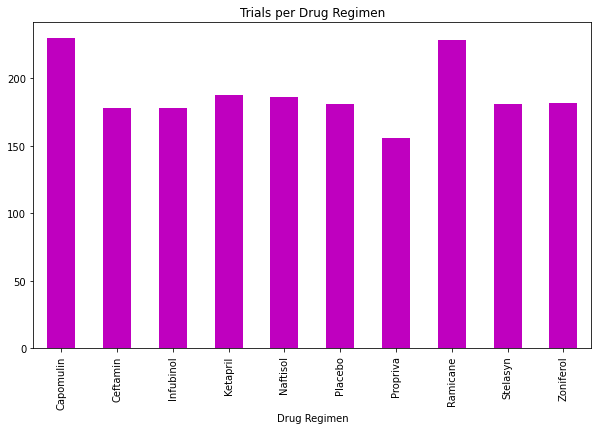

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
datapoints = summarystats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", figsize=(10,6), color = "m", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

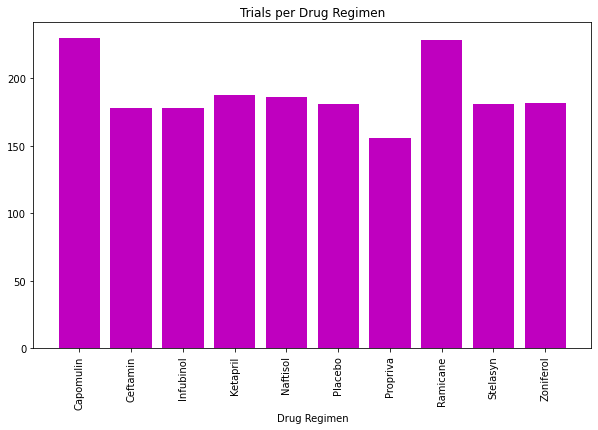

<Figure size 432x288 with 0 Axes>

In [11]:
#Bar Graph using pyplot
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,6))
plt.bar(x_axis, summarystats["Trials"], color = "m", align = "center")
plt.xticks(tick_locations, datapoints.index.values, rotation = "vertical")

# Set a title for the chart
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

In [12]:
#Unique Mice 
df_unique=pd.unique(cleaned_complete_data_df["Mouse ID"])
len(df_unique)

unique_mice=cleaned_complete_data_df.drop_duplicates(subset =["Mouse ID", "Drug Regimen"]).copy()
len(unique_mice)
unique_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [13]:
#Sort Data by Mouse Sex (gives all data points for each mouse)
mf= cleaned_complete_data_df.loc[:,"Sex"]
mf2 = mf.value_counts()
mf2

print(cleaned_complete_data_df["Sex"].value_counts()["Male"])
print(cleaned_complete_data_df["Sex"].value_counts()["Female"])

958
930


In [14]:
#Sort Data by Unique Mouse Sex (shows only unique mice, not duplicates)
true_mf1 = unique_mice.loc[:, "Sex"]
true_mf2 = true_mf1.value_counts()
true_mf2

Male      125
Female    124
Name: Sex, dtype: int64

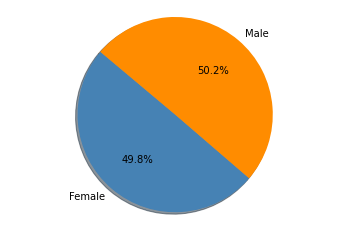

In [21]:
#Pie Chart Using Pyplot
#Data
sex = ["Female", "Male"]
numbers = [124,125]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.pie(numbers, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

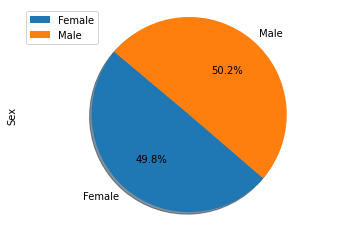

In [48]:
#Pie Chart Using Pandas
unique_mice.groupby(["Female", "Male"]).sum().plot(kind="pie", y = "Sex", shadow = True, startangle=140,
figsize=(6,4), autopct='%1.1f%%')
plt.axis("equal")
plt.show()